In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/Users/dev/Personal/DS & AI Class Notes/Data Sets/Naive Bays/sent_analysis.csv")

In [3]:
df

,class,text
0,Pos,films adapted from comic books have had plent...
1,Pos,every now and then a movie comes along from a...
2,Pos,you ve got mail works alot better than it des...
3,Pos,jaws is a rare film that grabs your atte...
4,Pos,moviemaking is a lot like being the general m...
...,...,...
1995,Neg,if anything stigmata should be taken as...
1996,Neg,john boorman s zardoz is a goofy cinemati...
1997,Neg,the kids in the hall are an acquired taste ...
1998,Neg,there was a time when john carpenter was a gr...


## Punc.

In [4]:
import string

In [5]:
punc = string.punctuation

In [6]:
df["text_len"]=df["text"].map(lambda x : len(x))

In [7]:
df["text_NPunc"] = df["text"].map(lambda x : "".join([i for i in x if i not in punc]))

In [8]:
df["text_NPunc_len"] = df["text"].map(lambda x : len("".join([i for i in x if i not in punc])))

In [9]:
df

,class,text,text_len,text_NPunc,text_NPunc_len
0,Pos,films adapted from comic books have had plent...,4228,films adapted from comic books have had plent...,4226
1,Pos,every now and then a movie comes along from a...,4097,every now and then a movie comes along from a...,4096
2,Pos,you ve got mail works alot better than it des...,2422,you ve got mail works alot better than it des...,2421
3,Pos,jaws is a rare film that grabs your atte...,6093,jaws is a rare film that grabs your atte...,6093
4,Pos,moviemaking is a lot like being the general m...,3899,moviemaking is a lot like being the general m...,3896
...,...,...,...,...,...
1995,Neg,if anything stigmata should be taken as...,8357,if anything stigmata should be taken as...,8349
1996,Neg,john boorman s zardoz is a goofy cinemati...,6212,john boorman s zardoz is a goofy cinemati...,6212
1997,Neg,the kids in the hall are an acquired taste ...,2343,the kids in the hall are an acquired taste ...,2343
1998,Neg,there was a time when john carpenter was a gr...,3184,there was a time when john carpenter was a gr...,3184


## Remove Stop Words

In [10]:
from nltk.corpus import stopwords

In [11]:
stpwrds = stopwords.words('english')

In [12]:
df["text_NStpwrds"] = df["text_NPunc"].map(lambda x : " ".join([i for i in x.split() if i not in stpwrds]))

In [13]:
df["text_NStpwrds_len"] = df["text_NPunc"].map(lambda x : len(" ".join([i for i in x.split() if i not in stpwrds])))

In [14]:
df

,class,text,text_len,text_NPunc,text_NPunc_len,text_NStpwrds,text_NStpwrds_len
0,Pos,films adapted from comic books have had plent...,4228,films adapted from comic books have had plent...,4226,films adapted comic books plenty success wheth...,2811
1,Pos,every now and then a movie comes along from a...,4097,every now and then a movie comes along from a...,4096,every movie comes along suspect studio every i...,2591
2,Pos,you ve got mail works alot better than it des...,2422,you ve got mail works alot better than it des...,2421,got mail works alot better deserves order make...,1445
3,Pos,jaws is a rare film that grabs your atte...,6093,jaws is a rare film that grabs your atte...,6093,jaws rare film grabs attention shows single im...,3998
4,Pos,moviemaking is a lot like being the general m...,3899,moviemaking is a lot like being the general m...,3896,moviemaking lot like general manager nfl team ...,2537
...,...,...,...,...,...,...,...
1995,Neg,if anything stigmata should be taken as...,8357,if anything stigmata should be taken as...,8349,anything stigmata taken warning releasing simi...,5066
1996,Neg,john boorman s zardoz is a goofy cinemati...,6212,john boorman s zardoz is a goofy cinemati...,6212,john boorman zardoz goofy cinematic debacle fu...,4062
1997,Neg,the kids in the hall are an acquired taste ...,2343,the kids in the hall are an acquired taste ...,2343,kids hall acquired taste took least season wat...,1469
1998,Neg,there was a time when john carpenter was a gr...,3184,there was a time when john carpenter was a gr...,3184,time john carpenter great horror director cour...,1951


## Stemming and Tokenize

In [15]:
from nltk.tokenize import word_tokenize

In [16]:
from nltk.stem import PorterStemmer

In [17]:
pstem = PorterStemmer()

In [18]:
l = []
for i in word_tokenize(df["text_NStpwrds"][0]):
    l.append(pstem.stem(i))
print(l)

['film', 'adapt', 'comic', 'book', 'plenti', 'success', 'whether', 'superhero', 'batman', 'superman', 'spawn', 'gear', 'toward', 'kid', 'casper', 'arthous', 'crowd', 'ghost', 'world', 'never', 'realli', 'comic', 'book', 'like', 'hell', 'starter', 'creat', 'alan', 'moor', 'eddi', 'campbel', 'brought', 'medium', 'whole', 'new', 'level', 'mid', '80', '12', 'part', 'seri', 'call', 'watchmen', 'say', 'moor', 'campbel', 'thoroughli', 'research', 'subject', 'jack', 'ripper', 'would', 'like', 'say', 'michael', 'jackson', 'start', 'look', 'littl', 'odd', 'book', 'graphic', 'novel', '500', 'page', 'long', 'includ', 'nearli', '30', 'consist', 'noth', 'footnot', 'word', 'dismiss', 'film', 'sourc', 'get', 'past', 'whole', 'comic', 'book', 'thing', 'might', 'find', 'anoth', 'stumbl', 'block', 'hell', 'director', 'albert', 'allen', 'hugh', 'get', 'hugh', 'brother', 'direct', 'seem', 'almost', 'ludicr', 'cast', 'carrot', 'top', 'well', 'anyth', 'riddl', 'better', 'direct', 'film', 'set', 'ghetto', 'fe

In [19]:
df["text_Stem"] = df["text_NStpwrds"].map(lambda x : " ".join( [ pstem.stem(i) for i in word_tokenize(x) ] ))

In [20]:
df["text_Stem_len"] = df["text_NStpwrds"].map(lambda x : len(" ".join( [ pstem.stem(i) for i in word_tokenize(x) ] )))

In [21]:
df

,class,text,text_len,text_NPunc,text_NPunc_len,text_NStpwrds,text_NStpwrds_len,text_Stem,text_Stem_len
0,Pos,films adapted from comic books have had plent...,4228,films adapted from comic books have had plent...,4226,films adapted comic books plenty success wheth...,2811,film adapt comic book plenti success whether s...,2515
1,Pos,every now and then a movie comes along from a...,4097,every now and then a movie comes along from a...,4096,every movie comes along suspect studio every i...,2591,everi movi come along suspect studio everi ind...,2294
2,Pos,you ve got mail works alot better than it des...,2422,you ve got mail works alot better than it des...,2421,got mail works alot better deserves order make...,1445,got mail work alot better deserv order make fi...,1264
3,Pos,jaws is a rare film that grabs your atte...,6093,jaws is a rare film that grabs your atte...,6093,jaws rare film grabs attention shows single im...,3998,jaw rare film grab attent show singl imag scre...,3537
4,Pos,moviemaking is a lot like being the general m...,3899,moviemaking is a lot like being the general m...,3896,moviemaking lot like general manager nfl team ...,2537,moviemak lot like gener manag nfl team post sa...,2264
...,...,...,...,...,...,...,...,...,...
1995,Neg,if anything stigmata should be taken as...,8357,if anything stigmata should be taken as...,8349,anything stigmata taken warning releasing simi...,5066,anyth stigmata taken warn releas similarli the...,4427
1996,Neg,john boorman s zardoz is a goofy cinemati...,6212,john boorman s zardoz is a goofy cinemati...,6212,john boorman zardoz goofy cinematic debacle fu...,4062,john boorman zardoz goofi cinemat debacl funda...,3554
1997,Neg,the kids in the hall are an acquired taste ...,2343,the kids in the hall are an acquired taste ...,2343,kids hall acquired taste took least season wat...,1469,kid hall acquir tast took least season watch s...,1279
1998,Neg,there was a time when john carpenter was a gr...,3184,there was a time when john carpenter was a gr...,3184,time john carpenter great horror director cour...,1951,time john carpent great horror director cours ...,1726


In [22]:
df.columns

Index(['class', 'text', 'text_len', 'text_NPunc', 'text_NPunc_len',
       'text_NStpwrds', 'text_NStpwrds_len', 'text_Stem', 'text_Stem_len'],
      dtype='object')

In [23]:
df1 = df.drop(['text', 'text_len', 'text_NPunc', 'text_NPunc_len',
       'text_NStpwrds', 'text_NStpwrds_len', 'text_Stem_len'],axis=1)

In [24]:
df1

,class,text_Stem
0,Pos,film adapt comic book plenti success whether s...
1,Pos,everi movi come along suspect studio everi ind...
2,Pos,got mail work alot better deserv order make fi...
3,Pos,jaw rare film grab attent show singl imag scre...
4,Pos,moviemak lot like gener manag nfl team post sa...
...,...,...
1995,Neg,anyth stigmata taken warn releas similarli the...
1996,Neg,john boorman zardoz goofi cinemat debacl funda...
1997,Neg,kid hall acquir tast took least season watch s...
1998,Neg,time john carpent great horror director cours ...


## Checking Balance of the Dependent Column

<AxesSubplot:ylabel='class'>

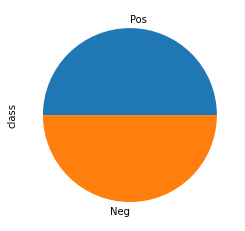

In [25]:
df1["class"].value_counts().plot(kind = "pie")

## Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le = LabelEncoder()

In [28]:
df1 = pd.concat([df1,pd.DataFrame(le.fit_transform(df1["class"]),columns=["Class"])],axis=1)

In [29]:
le.classes_

array(['Neg', 'Pos'], dtype=object)

In [30]:
df1.drop("class",axis=1,inplace=True)

In [31]:
df1.columns = ["Msg","Label"]

In [32]:
X = df1[["Msg"]]

In [33]:
y = df1["Label"]

In [34]:
X.sample()

,Msg
690,charli sheen star zane radio astronom listen s...


In [35]:
y.sample()

1665    0
Name: Label, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=.20)

In [38]:
Xtrain.shape , Xtest.shape , X.shape

((1600, 1), (400, 1), (2000, 1))

In [39]:
ytrain.shape , ytest.shape , y.shape

((1600,), (400,), (2000,))

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
tfvec = TfidfVectorizer()

In [42]:
tfvec.fit(Xtrain["Msg"])

TfidfVectorizer()

In [43]:
tfvec_Xtrain = tfvec.transform(Xtrain["Msg"])

In [44]:
tfvec_Xtest = tfvec.transform(Xtest["Msg"])

In [45]:
tfvec_Xtest

<400x23769 sparse matrix of type '<class 'numpy.float64'>'
	with 100025 stored elements in Compressed Sparse Row format>

In [46]:
from sklearn.naive_bayes import MultinomialNB

In [47]:
mn = MultinomialNB()

In [48]:
mn.fit(tfvec_Xtrain,ytrain)

MultinomialNB()

In [49]:
mn.score(tfvec_Xtest,ytest)

0.79

## Testing

In [50]:
result = { 0 : "It's a Neg. Review", 1 : "It's a Pos. Review"}

In [51]:
msg1 = ["I Watched That And I'm totally Amazed with the Direction"]

In [52]:
msg1_tfvec = tfvec.transform(msg1)

In [53]:
mn.predict(msg1_tfvec)

array([1])

In [54]:
result[mn.predict(msg1_tfvec)[0]]

"It's a Pos. Review"

In [55]:
msg2 = ["I'm totally disappointed with the sounds and the action also"]

In [56]:
msg2_tfvec = tfvec.transform(msg2)

In [57]:
mn.predict(msg2_tfvec)

array([1])

In [58]:
result[mn.predict(msg2_tfvec)[0]]

"It's a Pos. Review"

In [59]:
msg3 = ["I'm totally Like the movie"]

In [60]:
msg3_tfvec = tfvec.transform(msg3)

In [61]:
mn.predict(msg3_tfvec)

array([0])

In [62]:
result[mn.predict(msg3_tfvec)[0]]

"It's a Neg. Review"

In [63]:
import speech_recognition as sr

In [64]:
r = sr.Recognizer()

In [65]:
## For Checking the Sentiment of the Said Words. 


def msgvalid(text):
    global ss
    t = tfvec.transform([text])
    mn.predict(t)
    ss= result[mn.predict(t)[0]]
    print()
    print(ss)

In [66]:
## For Speaking Back The Said Words   


def speak(msg):
    import pyttsx3
    engine = pyttsx3.init()
    engine.say(msg)
    engine.runAndWait()

In [67]:
with sr.Microphone() as src:
    audio = r.listen(src)
    msg = r.recognize_google(audio)
    print(msg)
    msgvalid(msg)
    speak(msg)
    speak(ss)

hello hello

It's a Neg. Review
